In [ ]:
!git clone https://github.com/kuleshov/audio-super-res.git

Cloning into 'audio-super-res'...
remote: Enumerating objects: 607, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 607 (delta 72), reused 55 (delta 24), pack-reused 459
Receiving objects: 100% (607/607), 58.20 MiB | 33.37 MiB/s, done.
Resolving deltas: 100% (222/222), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Sensor Signal Data process**

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR'
/content


In [ ]:
!python code/prep_data.py \
  --file-list  dataset_prepare/train_data.txt \
  --in-dir Total_data \
  --out dataset_prepare/sensor_data_s_8_total-train.2.4.4.2.h5 \
  --scale 8 \
  --sr 4 \
  --interpolate


In [ ]:
!python code/prep_data.py \
  --file-list  dataset_prepare/test_data.txt \
  --in-dir Sensor_data_field6 \
  --out dataset_prepare/sensor_data_s_8_fld6-test.2.4.4.2.h5 \
  --scale 8 \
  --sr 4 \
  --interpolate

In [ ]:
!python code/sr_model.py

In [ ]:
!python code/utils.py

# Residual Network

In [ ]:
!python code/train.py

load residual network ..
2022-03-19 07:10:15.517182: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 384, 16)      64          ['input_1[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 384, 16)      0           ['conv1d[0][0]']                 
                                                                                                  
 conv1

In [ ]:
!python code/test.py

load residual network ..
2022-03-19 07:14:51.500352: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld1-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
snr: 35.485909919911734
x_pr len: 384


In [ ]:
!python code/test.py

load residual network ..
2022-03-19 07:16:05.367685: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld2-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
snr: 39.141839656617904
x_pr len: 384


In [ ]:
!python code/test.py

load residual network ..
2022-03-19 07:17:03.539557: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld6-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
snr: 40.22553089960078
x_pr len: 384


# Progressive Network

In [ ]:
!python code/train.py

laplacian model load..
2022-03-19 07:18:10.127648: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
net_tmp: (None, 48, 16)
net_tmp: (None, 48, 16)
net_feature before subpixel: (None, 48, 16)
net_feature: (1, 96, 16)
net_audio: (1, 96, 16)
net_tmp: (1, 96, 16)
net_tmp: (1, 96, 16)
net_feature before subpixel: (1, 96, 16)
net_audio: (1, 192, 16)
net_tmp: (1, 192, 16)
net_tmp: (1, 192, 16)
net_feature before subpixel: (1, 192, 16)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 48, 16)       64          ['inpu

In [ ]:
!python code/test.py

laplacian model load..
2022-03-19 07:24:35.413688: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
net_tmp: (None, 48, 16)
net_tmp: (None, 48, 16)
net_feature before subpixel: (None, 48, 16)
net_feature: (1, 96, 16)
net_audio: (1, 96, 16)
net_tmp: (1, 96, 16)
net_tmp: (1, 96, 16)
net_feature before subpixel: (1, 96, 16)
net_audio: (1, 192, 16)
net_tmp: (1, 192, 16)
net_tmp: (1, 192, 16)
net_feature before subpixel: (1, 192, 16)
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld1-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 48, 1)
(1, 384, 1)
snr: 42.16519753968234
x_pr len: 384


In [ ]:
!python code/test.py

laplacian model load..
2022-03-19 07:25:20.622321: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
net_tmp: (None, 48, 16)
net_tmp: (None, 48, 16)
net_feature before subpixel: (None, 48, 16)
net_feature: (1, 96, 16)
net_audio: (1, 96, 16)
net_tmp: (1, 96, 16)
net_tmp: (1, 96, 16)
net_feature before subpixel: (1, 96, 16)
net_audio: (1, 192, 16)
net_tmp: (1, 192, 16)
net_tmp: (1, 192, 16)
net_feature before subpixel: (1, 192, 16)
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld2-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 48, 1)
(1, 384, 1)
snr: 45.96065084670435
x_pr len: 384


In [ ]:
!python code/test.py

laplacian model load..
2022-03-19 07:26:39.828237: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
net_tmp: (None, 48, 16)
net_tmp: (None, 48, 16)
net_feature before subpixel: (None, 48, 16)
net_feature: (1, 96, 16)
net_audio: (1, 96, 16)
net_tmp: (1, 96, 16)
net_tmp: (1, 96, 16)
net_feature before subpixel: (1, 96, 16)
net_audio: (1, 192, 16)
net_tmp: (1, 192, 16)
net_tmp: (1, 192, 16)
net_feature before subpixel: (1, 192, 16)
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld6-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 48, 1)
(1, 384, 1)
snr: 46.52284842728335
x_pr len: 384


# Sensor Signal Field1

**Residual Netowrk**

In [ ]:
!python code/train.py

load residual network ..
2022-02-21 06:27:41.866180: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 384, 16)      64          ['input_1[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 384, 16)      0           ['conv1d[0][0]']                 
                                                                                                  
 conv1

In [ ]:
!python code/test.py

load residual network ..
2022-02-21 06:30:13.606502: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld1-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
snr: 36.796010628534475
x_pr len: 384


**Residual network with tchebichef moment**

In [ ]:
!python code/train.py

load residual network with tchebichef moment..
2022-02-21 06:32:42.013045: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 384, 16)      64          ['input_1[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 384, 16)      0           ['conv1d[0][0]']                 
                                                                                   

In [ ]:
!python code/test.py

load residual network with tchebichef moment..
2022-02-21 06:39:02.501426: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld1-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 384, 1)
1
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
snr: 33.54132960155038
x_pr len: 384


**Progressive Network**

In [ ]:
!python code/train.py

laplacian model load..
2022-03-01 17:21:08.808773: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
net_tmp: (None, 48, 16)
net_tmp: (None, 48, 16)
net_feature before subpixel: (None, 48, 16)
net_feature: (1, 96, 16)
net_audio: (1, 96, 16)
net_tmp: (1, 96, 16)
net_tmp: (1, 96, 16)
net_feature before subpixel: (1, 96, 16)
net_audio: (1, 192, 16)
net_tmp: (1, 192, 16)
net_tmp: (1, 192, 16)
net_feature before subpixel: (1, 192, 16)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 48, 16)       64          ['inpu

In [ ]:
!python code/test.py

laplacian model load..
2022-03-01 17:30:44.601943: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
net_tmp: (None, 48, 16)
net_tmp: (None, 48, 16)
net_feature before subpixel: (None, 48, 16)
net_feature: (1, 96, 16)
net_audio: (1, 96, 16)
net_tmp: (1, 96, 16)
net_tmp: (1, 96, 16)
net_feature before subpixel: (1, 96, 16)
net_audio: (1, 192, 16)
net_tmp: (1, 192, 16)
net_tmp: (1, 192, 16)
net_feature before subpixel: (1, 192, 16)
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld1-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 48, 1)
(1, 384, 1)
snr: 41.13260026972255
x_pr len: 384


# Sensor Signal Field2

**Residul Network**

In [ ]:
!python code/train.py

load residual network ..
2022-02-21 06:46:23.631511: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 384, 16)      64          ['input_1[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 384, 16)      0           ['conv1d[0][0]']                 
                                                                                                  
 conv1

In [ ]:
!python code/test.py

load residual network ..
2022-02-21 06:55:02.307640: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld2-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
snr: 39.14478489461272
x_pr len: 384


**Residual network with tchebichef moment**

In [ ]:
!python code/train.py

load residual network with tchebichef moment..
2022-02-21 07:00:56.540353: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 384, 16)      64          ['input_1[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 384, 16)      0           ['conv1d[0][0]']                 
                                                                                   

In [ ]:
!python code/test.py

load residual network with tchebichef moment..
2022-02-21 07:02:54.442498: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld2-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 384, 1)
1
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
snr: 36.94344256454834
x_pr len: 384


**Progressive Network**

In [ ]:
!python code/train.py

laplacian model load..
2022-03-01 17:36:47.295092: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
net_tmp: (None, 48, 16)
net_tmp: (None, 48, 16)
net_feature before subpixel: (None, 48, 16)
net_feature: (1, 96, 16)
net_audio: (1, 96, 16)
net_tmp: (1, 96, 16)
net_tmp: (1, 96, 16)
net_feature before subpixel: (1, 96, 16)
net_audio: (1, 192, 16)
net_tmp: (1, 192, 16)
net_tmp: (1, 192, 16)
net_feature before subpixel: (1, 192, 16)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 48, 16)       64          ['inpu

In [ ]:
!python code/test.py

laplacian model load..
2022-03-01 17:40:14.801625: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
net_tmp: (None, 48, 16)
net_tmp: (None, 48, 16)
net_feature before subpixel: (None, 48, 16)
net_feature: (1, 96, 16)
net_audio: (1, 96, 16)
net_tmp: (1, 96, 16)
net_tmp: (1, 96, 16)
net_feature before subpixel: (1, 96, 16)
net_audio: (1, 192, 16)
net_tmp: (1, 192, 16)
net_tmp: (1, 192, 16)
net_feature before subpixel: (1, 192, 16)
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld2-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 48, 1)
(1, 384, 1)
snr: 42.81154729760162
x_pr len: 384


# Sensor Signal Field3

**Residual Network**

In [ ]:
!python code/train.py

load residual network ..
2022-02-21 07:06:54.553840: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 384, 16)      64          ['input_1[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 384, 16)      0           ['conv1d[0][0]']                 
                                                                                                  
 conv1

In [ ]:
!python code/test.py

load residual network ..
2022-02-21 07:12:51.167562: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld3-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
snr: 39.53685065206457
x_pr len: 384


**Residual netwrok with tchebichef moment**

In [ ]:
!python code/train.py

load residual network with tchebichef moment..
2022-02-21 07:15:59.351677: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 384, 16)      64          ['input_1[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 384, 16)      0           ['conv1d[0][0]']                 
                                                                                   

In [ ]:
!python code/test.py

load residual network with tchebichef moment..
2022-02-21 07:20:56.747050: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld3-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 384, 1)
1
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
snr: 39.54768904647163
x_pr len: 384


**Progressive Network**

In [ ]:
!python code/train.py

laplacian model load..
2022-03-01 17:43:03.438793: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
net_tmp: (None, 48, 16)
net_tmp: (None, 48, 16)
net_feature before subpixel: (None, 48, 16)
net_feature: (1, 96, 16)
net_audio: (1, 96, 16)
net_tmp: (1, 96, 16)
net_tmp: (1, 96, 16)
net_feature before subpixel: (1, 96, 16)
net_audio: (1, 192, 16)
net_tmp: (1, 192, 16)
net_tmp: (1, 192, 16)
net_feature before subpixel: (1, 192, 16)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 48, 16)       64          ['inpu

In [ ]:
!python code/test.py

laplacian model load..
2022-03-01 17:45:23.873904: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
net_tmp: (None, 48, 16)
net_tmp: (None, 48, 16)
net_feature before subpixel: (None, 48, 16)
net_feature: (1, 96, 16)
net_audio: (1, 96, 16)
net_tmp: (1, 96, 16)
net_tmp: (1, 96, 16)
net_feature before subpixel: (1, 96, 16)
net_audio: (1, 192, 16)
net_tmp: (1, 192, 16)
net_tmp: (1, 192, 16)
net_feature before subpixel: (1, 192, 16)
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld3-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 48, 1)
(1, 384, 1)
snr: 46.74647801993974
x_pr len: 384


# Sensor Signal Field6

**Residual Network**

In [ ]:
!python code/train.py

load residual network ..
2022-02-21 07:31:40.248971: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 384, 16)      64          ['input_1[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 384, 16)      0           ['conv1d[0][0]']                 
                                                                                                  
 conv1

In [ ]:
!python code/test.py

load residual network ..
2022-02-21 07:42:08.010690: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld6-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
snr: 39.24369283859807
x_pr len: 384


**Residual Network with Tchebichef moment**

In [ ]:
!python code/train.py

load residual network with tchebichef moment..
2022-02-21 07:43:00.813171: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 384, 16)      64          ['input_1[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 384, 16)      0           ['conv1d[0][0]']                 
                                                                                   

In [ ]:
!python code/test.py

load residual network with tchebichef moment..
2022-02-21 07:44:55.253941: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld6-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 384, 1)
1
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
snr: 36.349534094614306
x_pr len: 384


**Progressive Network**

In [ ]:
!python code/train.py

laplacian model load..
2022-03-01 17:49:33.534130: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
net_tmp: (None, 48, 16)
net_tmp: (None, 48, 16)
net_feature before subpixel: (None, 48, 16)
net_feature: (1, 96, 16)
net_audio: (1, 96, 16)
net_tmp: (1, 96, 16)
net_tmp: (1, 96, 16)
net_feature before subpixel: (1, 96, 16)
net_audio: (1, 192, 16)
net_tmp: (1, 192, 16)
net_tmp: (1, 192, 16)
net_feature before subpixel: (1, 192, 16)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 48, 16)       64          ['inpu

In [ ]:
!python code/test.py

laplacian model load..
2022-03-01 17:51:31.439732: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
net_tmp: (None, 48, 16)
net_tmp: (None, 48, 16)
net_feature before subpixel: (None, 48, 16)
net_feature: (1, 96, 16)
net_audio: (1, 96, 16)
net_tmp: (1, 96, 16)
net_tmp: (1, 96, 16)
net_feature before subpixel: (1, 96, 16)
net_audio: (1, 192, 16)
net_tmp: (1, 192, 16)
net_tmp: (1, 192, 16)
net_feature before subpixel: (1, 192, 16)
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld6-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 48, 1)
(1, 384, 1)
snr: 40.77354203026948
x_pr len: 384


# Bi-Cubic Interpolation Method

In [ ]:
cd code

/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/code


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa
from scipy import interpolate
from train import load_h5 ,  load_h5_list
def spline_up(x_lr, r):
  #x_lr = x_lr.flatten()
  x_hr_len = len(x_lr) * r
  x_sp = np.zeros(x_hr_len)

  i_lr = np.arange(x_hr_len, step=r)
  i_hr = np.arange(x_hr_len)

  f = interpolate.splrep(i_lr, x_lr)

  x_sp = interpolate.splev(i_hr, f)

  return x_sp
def get_spectrum(x, n_fft=1):
  S = librosa.stft(x, n_fft)
  p = np.angle(S)
  S = np.log1p(np.abs(S))
  return S

def save_spectrum(S, outfile=' '):
  plt.imshow(S.T,aspect=0.1)
  # plt.xlim([0,lim])
  #plt.tight_layout()
  plt.savefig(outfile)
def calc_snr2(Y, P):
  sqrt_l2_loss = np.sqrt(np.mean((P-Y)**2 + 1e-6))
  sqrn_l2_norm = np.sqrt(np.mean(Y**2))
  snr = 20 * np.log(sqrn_l2_norm / sqrt_l2_loss + 1e-8) / np.log(10.)
  avg_snr = np.mean(snr)
  return avg_snr

#bi_cubic
datasets = load_h5_list('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/dataset_prepare/test_data/')

for dataset in datasets:
  X , Y = load_h5(dataset)
  x_hr = X.flatten()
  X_hr = Y.flatten()
  #x_hr = np.array(x_hr)
  x_pr = spline_up(x_hr,8)
  avg_snr=calc_snr2(X_hr,x_pr)
  print("snr:",avg_snr)
  x_pr = x_pr[:len(x_pr)-7]
  dict = {'field6': x_pr}
  df = pd.DataFrame(dict)
  df.to_csv('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/out_csv/field6/' +'signal28_bicu.pr.csv')
  s = get_spectrum(x_pr,n_fft=32)
  save_spectrum(s,outfile='/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/spectrograms/field6/signal28_bicu_pr.png')


SNR fl1:31.81062172378827

---


SNR fl2:35.28532957021823

---


SNR fl3:35.74432802235649

---


SNR fl6:35.505372797105295

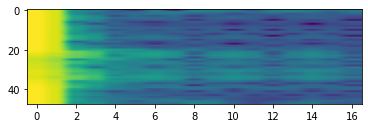

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa
from scipy import interpolate

def get_spectrum(x, n_fft=1):
  S = librosa.stft(x, n_fft)
  p = np.angle(S)
  S = np.log1p(np.abs(S))
  return S

def save_spectrum(S, outfile=' '):
  plt.imshow(S.T,aspect=0.1)
  # plt.xlim([0,lim])
  #plt.tight_layout()
  plt.savefig(outfile)

wav = '/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/'
dt = pd.read_csv(wav +'out/signal_fl6_prog.pr.csv')
x_pr = dt['field6']
x_pr = np.array(x_pr)

s = get_spectrum(x_pr,n_fft=32)
save_spectrum(s,outfile=wav+'spectrograms/field6/signal28_prog_pr.png')


# Spectrogram Analysis For All Test Signals

**Field1 Signal**

Text(0.5, 1.0, '(4)')

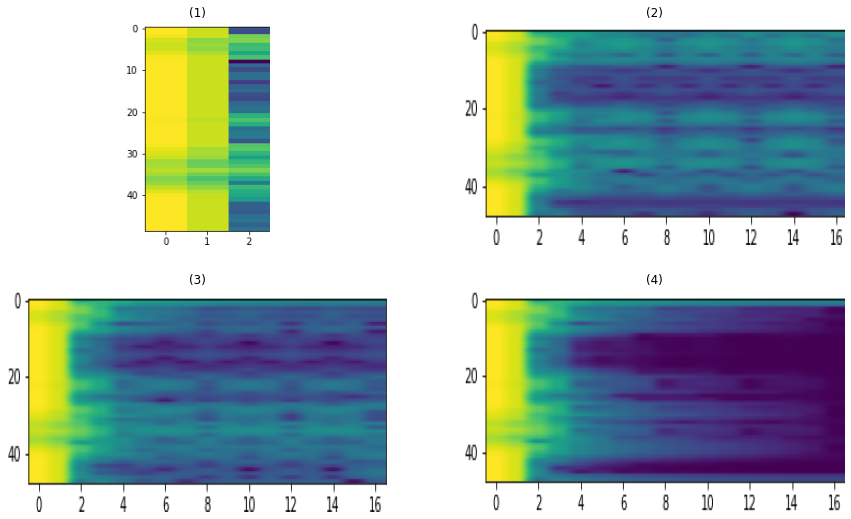

In [ ]:

# code for displaying multiple images in one figure

#import libraries
import cv2
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(15, 9))

# setting values to rows and column variables
rows = 2
columns = 2

# reading images
Image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/crop_spect/field1/signal4_hr.png')
Image1 = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)
Image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/crop_spect/field1/signal4_pr.png')
Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)
Image3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/crop_spect/field1/signal4_tf_pr.png')
Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB)
Image4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/crop_spect/field1/signal4_bicu_pr.png')
Image4 = cv2.cvtColor(Image4, cv2.COLOR_BGR2RGB)

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1,aspect="equal")
plt.axis('off')
plt.title("(1)")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2,aspect="auto")
plt.axis('off')
plt.title("(2)")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image3,aspect="auto")
plt.axis('off')
plt.title("(3)")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Image4,aspect="auto")
plt.axis('off')
plt.title("(4)")

**Field2 Signal**

Text(0.5, 1.0, '(4)')

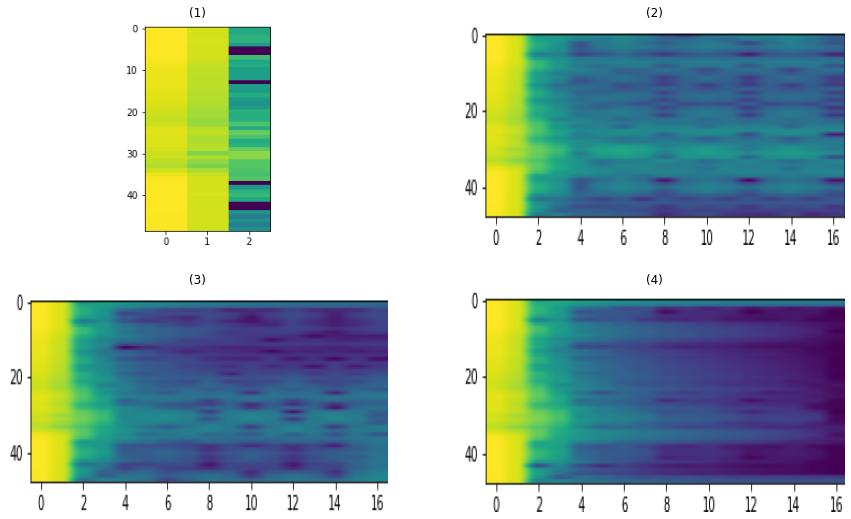

In [ ]:

# code for displaying multiple images in one figure

#import libraries
import cv2
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(15, 9))

# setting values to rows and column variables
rows = 2
columns = 2

# reading images
Image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/crop_spect/field2/signal12_hr.png')
Image1 = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)
Image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/crop_spect/field2/signal12_pr.png')
Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)
Image3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/crop_spect/field2/signal12_tf_pr.png')
Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB)
Image4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/crop_spect/field2/signal12_bicu_pr.png')
Image4 = cv2.cvtColor(Image4, cv2.COLOR_BGR2RGB)

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1,aspect="equal")
plt.axis('off')
plt.title("(1)")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2,aspect="auto")
plt.axis('off')
plt.title("(2)")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image3,aspect="auto")
plt.axis('off')
plt.title("(3)")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Image4,aspect="auto")
plt.axis('off')
plt.title("(4)")

**Field3 Signal**

Text(0.5, 1.0, '(4)')

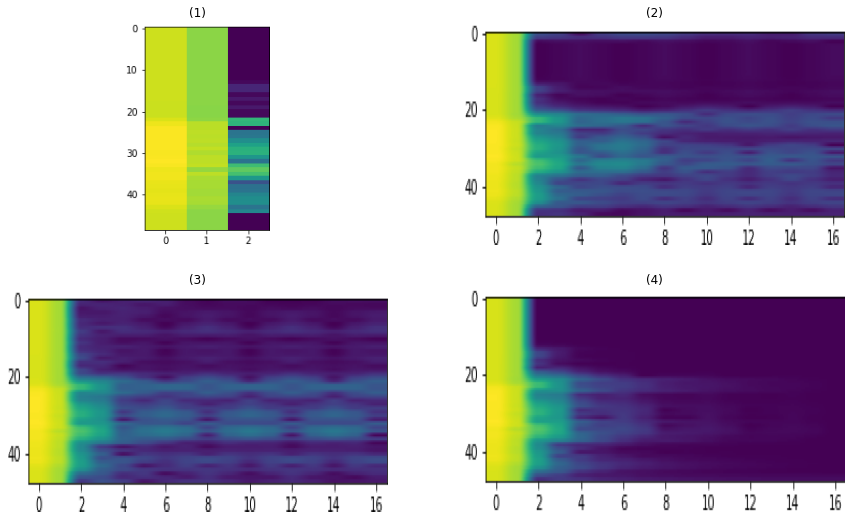

In [ ]:

# code for displaying multiple images in one figure

#import libraries
import cv2
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(15, 9))

# setting values to rows and column variables
rows = 2
columns = 2

# reading images
Image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/crop_spect/field3/signal23_hr.png')
Image1 = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)
Image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/crop_spect/field3/signal23_pr.png')
Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)
Image3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/crop_spect/field3/signal23_tf_pr.png')
Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB)
Image4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/crop_spect/field3/signal23_bicu_pr.png')
Image4 = cv2.cvtColor(Image4, cv2.COLOR_BGR2RGB)

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1,aspect="equal")
plt.axis('off')
plt.title("(1)")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2,aspect="auto")
plt.axis('off')
plt.title("(2)")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image3,aspect="auto")
plt.axis('off')
plt.title("(3)")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Image4,aspect="auto")
plt.axis('off')
plt.title("(4)")

**Field6 Signal**

Text(0.5, 1.0, '(4)')

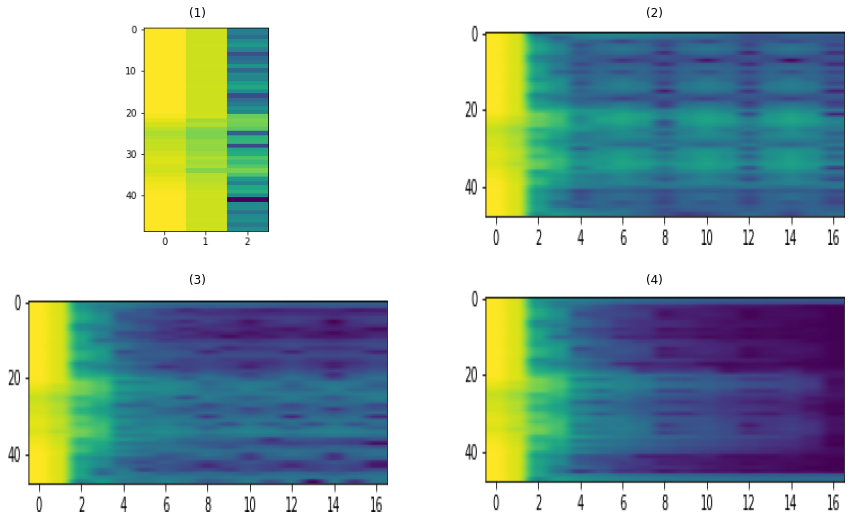

In [ ]:

# code for displaying multiple images in one figure

#import libraries
import cv2
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(15, 9))

# setting values to rows and column variables
rows = 2
columns = 2

# reading images
Image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/crop_spect/field6/signal28_hr.png')
Image1 = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)
Image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/crop_spect/field6/signal28_pr.png')
Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)
Image3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/crop_spect/field6/signal28_tf_pr.png')
Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB)
Image4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/crop_spect/field6/signal28_bicu_pr.png')
Image4 = cv2.cvtColor(Image4, cv2.COLOR_BGR2RGB)

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1,aspect="equal")
plt.axis('off')
plt.title("(1)")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2,aspect="auto")
plt.axis('off')
plt.title("(2)")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image3,aspect="auto")
plt.axis('off')
plt.title("(3)")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Image4,aspect="auto")
plt.axis('off')
plt.title("(4)")

# Histogram Analysis For All Test Signals

1610
1610


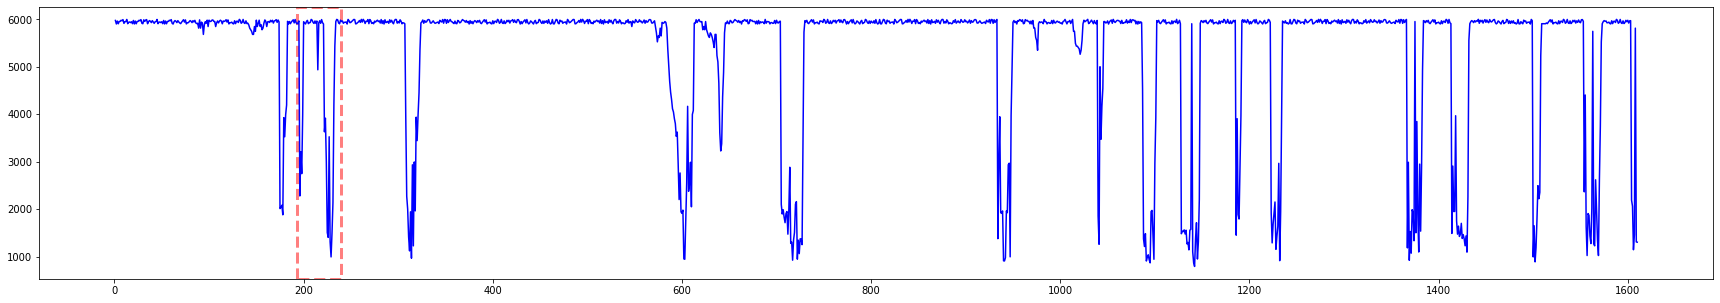

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# scale = 8
n_point = 1610
wav = '/content/drive/MyDrive/Colab Notebooks/Audio_SR/Node 4 and 4_1 data_4_2 data_18 April _2021.csv'
dt = pd.read_csv(wav)
x =  np.arange(1,n_point+1,1).tolist()
y = dt['field1']
print(len(x))
print(len(y))

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
# plt.plot(x,y)
#plt.bar(x,y,width=1.0)
plt.plot(x,y, color = 'blue')
#plt.axvspan(193,240,color='red',closed=True,fill=False,linestyle='--',linewidth= 3.0, alpha=0.5)
# plt.xlim(0,n_point)
plt.show()


1610
1610


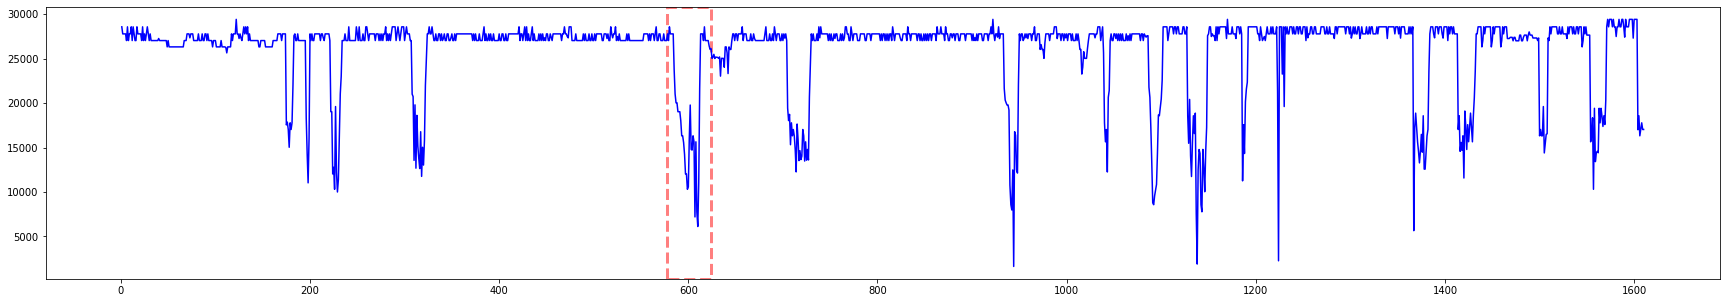

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# scale = 8
n_point = 1610
wav = '/content/drive/MyDrive/Colab Notebooks/Audio_SR/Node 4 and 4_1 data_4_2 data_18 April _2021.csv'
dt = pd.read_csv(wav)
x =  np.arange(1,n_point+1,1).tolist()
y = dt['field2']
print(len(x))
print(len(y))

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
# plt.plot(x,y)
#plt.bar(x,y,width=1.0)
plt.plot(x,y, color = 'blue')
plt.axvspan(577,624,color='red',closed=True,fill=False,linestyle='--',linewidth= 3.0, alpha=0.5)

# plt.xlim(0,n_point)
plt.show()




1610
1610


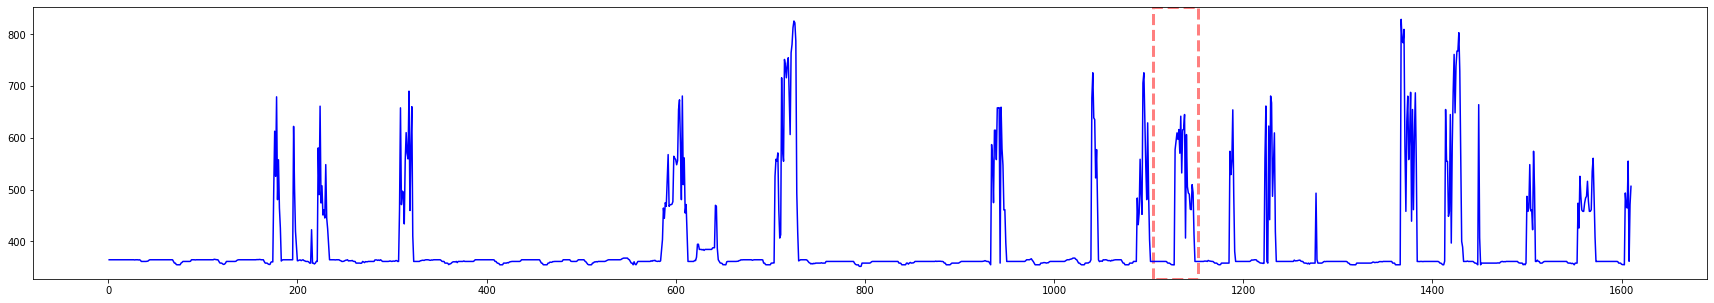

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# scale = 8
n_point = 1610
wav = '/content/drive/MyDrive/Colab Notebooks/Audio_SR/Node 4 and 4_1 data_4_2 data_18 April _2021.csv'
dt = pd.read_csv(wav)
x =  np.arange(1,n_point+1,1).tolist()
y = dt['field3']
print(len(x))
print(len(y))

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
# plt.plot(x,y)
#plt.bar(x,y,width=1.0)
plt.plot(x,y, color = 'blue')
plt.axvspan(1105,1152,color='red',closed=True,fill=False,linestyle='--',linewidth= 3.0, alpha=0.5)
# plt.xlim(0,n_point)
plt.show()



1610
1610


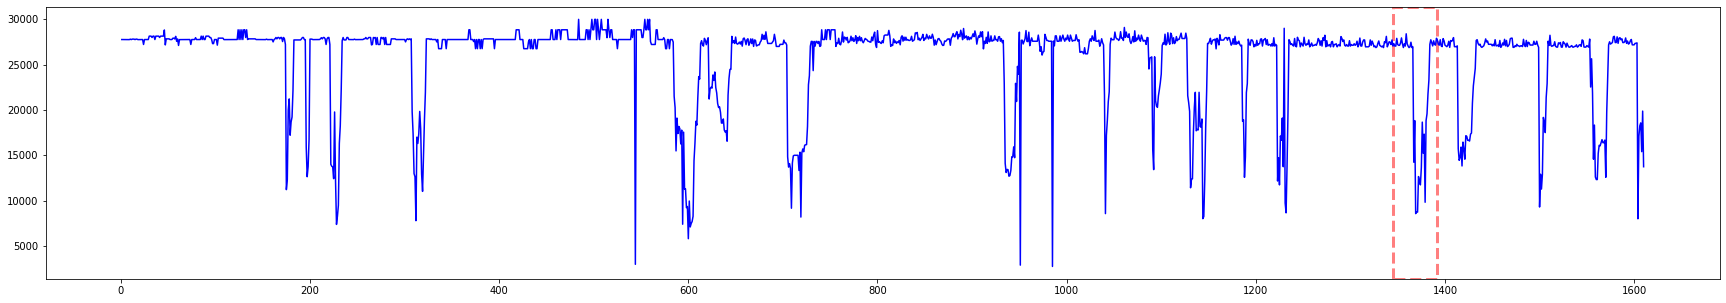

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# scale = 8
n_point = 1610
wav = '/content/drive/MyDrive/Colab Notebooks/Audio_SR/Node 4 and 4_1 data_4_2 data_18 April _2021.csv'
dt = pd.read_csv(wav)
x =  np.arange(1,n_point+1,1).tolist()
y = dt['field6']
print(len(x))
print(len(y))

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
# plt.plot(x,y)
#plt.bar(x,y,width=1.0)
plt.plot(x,y, color = 'blue')
plt.axvspan(1345,1392,color='red',closed=True,fill=False,linestyle='--',linewidth= 3.0, alpha=0.5)
# plt.xlim(0,n_point)
plt.show()



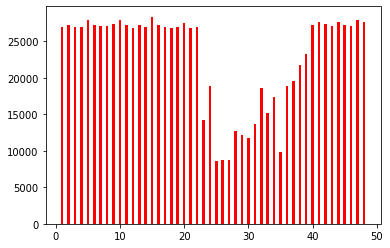

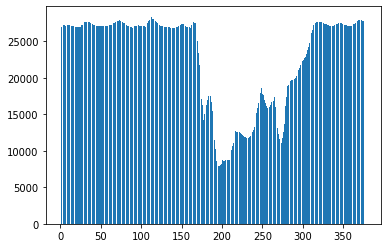

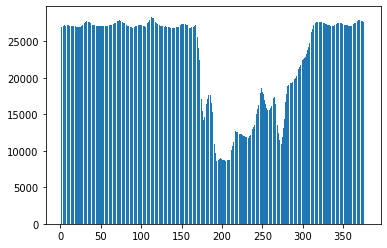

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
scale = 8
n_point = 48
#main signal
wav = '/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/out/signal_fl6.hr.csv'
dt = pd.read_csv(wav)
x =  np.arange(1,n_point+1,1).tolist()
y = dt['field6']

plt.bar(x,y ,width=0.4 , color ='red')
plt.show()

#Res_net
wav = '/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/out/signal_fl6_res.pr.csv'
dt = pd.read_csv(wav)
x =  np.arange(1,n_point*scale +1 - 7,1).tolist()
y = dt['field6']

plt.bar(x,y ,width=0.8)
plt.show()

#ProgNet
wav = '/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/out/signal_fl6_prog.pr.csv'
dt = pd.read_csv(wav)
x =  np.arange(1,n_point*scale +1-7,1).tolist()
y = dt['field6']

plt.bar(x,y ,width=0.8)
plt.show()

#Bi-cubic
# wav = '/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/out_csv/field6/signal28_prog.pr.csv'
# dt = pd.read_csv(wav)
# x =  np.arange(1,n_point*scale +1-7,1).tolist()
# y = dt['field6']

# plt.bar(x,y ,width=0.8)
# plt.show()


**Field1 Test Signal**

(-0.5, 380.5, 247.5, -0.5)

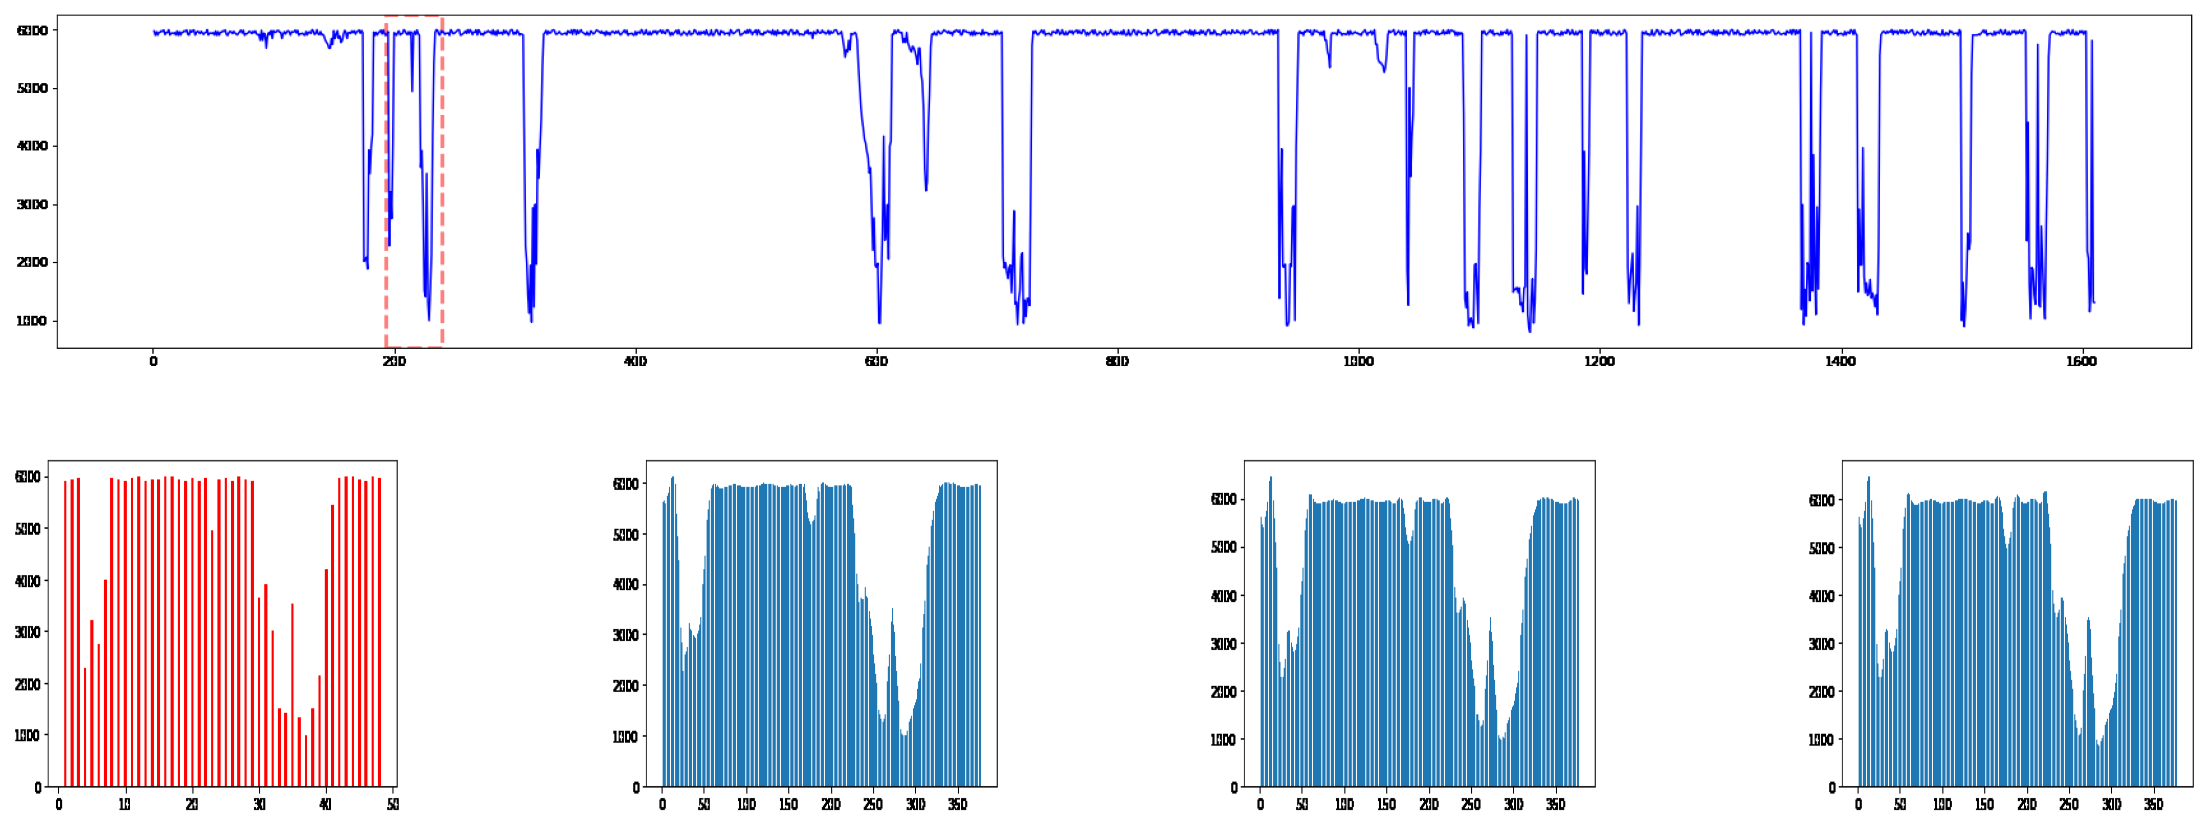

In [ ]:

# code for displaying multiple images in one figure

#import libraries
import cv2
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 5)
gs.update(wspace=0.5)

# create figure
fig = plt.figure(figsize=(50,15))

# setting values to rows and column variables
rows = 2
columns = 4

# reading images
Image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/whole_signal/sig_fl1.png')
Image1 = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)
Image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/histograms/field1/sig4_hr.png')
Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)
Image3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/histograms/field1/sig4_pr.png')
Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB)
Image4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/histograms/field1/sig4_tf_pr.png')
Image4 = cv2.cvtColor(Image4, cv2.COLOR_BGR2RGB)
Image5 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/histograms/field1/sig4_bicu_pr.png')
Image5 = cv2.cvtColor(Image5, cv2.COLOR_BGR2RGB)
# Adds a subplot at the 1st position
#fig.add_subplot(rows, columns, 1)
fig.add_subplot(gs[0, 0:4])
# showing image
plt.imshow(Image1,aspect="auto")
plt.axis('off')
#plt.title("(1)")

# Adds a subplot at the 2nd position
fig.add_subplot(gs[1,0])

# showing image
plt.imshow(Image2,aspect="auto")
plt.axis('off')
#plt.title("(2)")

# Adds a subplot at the 3rd position
fig.add_subplot(gs[1,1])

# showing image
plt.imshow(Image3,aspect="auto")
plt.axis('off')
#plt.title("(3)")

# Adds a subplot at the 4th position
fig.add_subplot(gs[1,2])

# showing image
plt.imshow(Image4,aspect="auto")
plt.axis('off')
#plt.title("(4)")

# Adds a subplot at the 5th position
fig.add_subplot(gs[1,3])

# showing image
plt.imshow(Image5,aspect="auto")
plt.axis('off')
#plt.title("(5)")

**Field2 Test Signal**

(-0.5, 386.5, 251.5, -0.5)

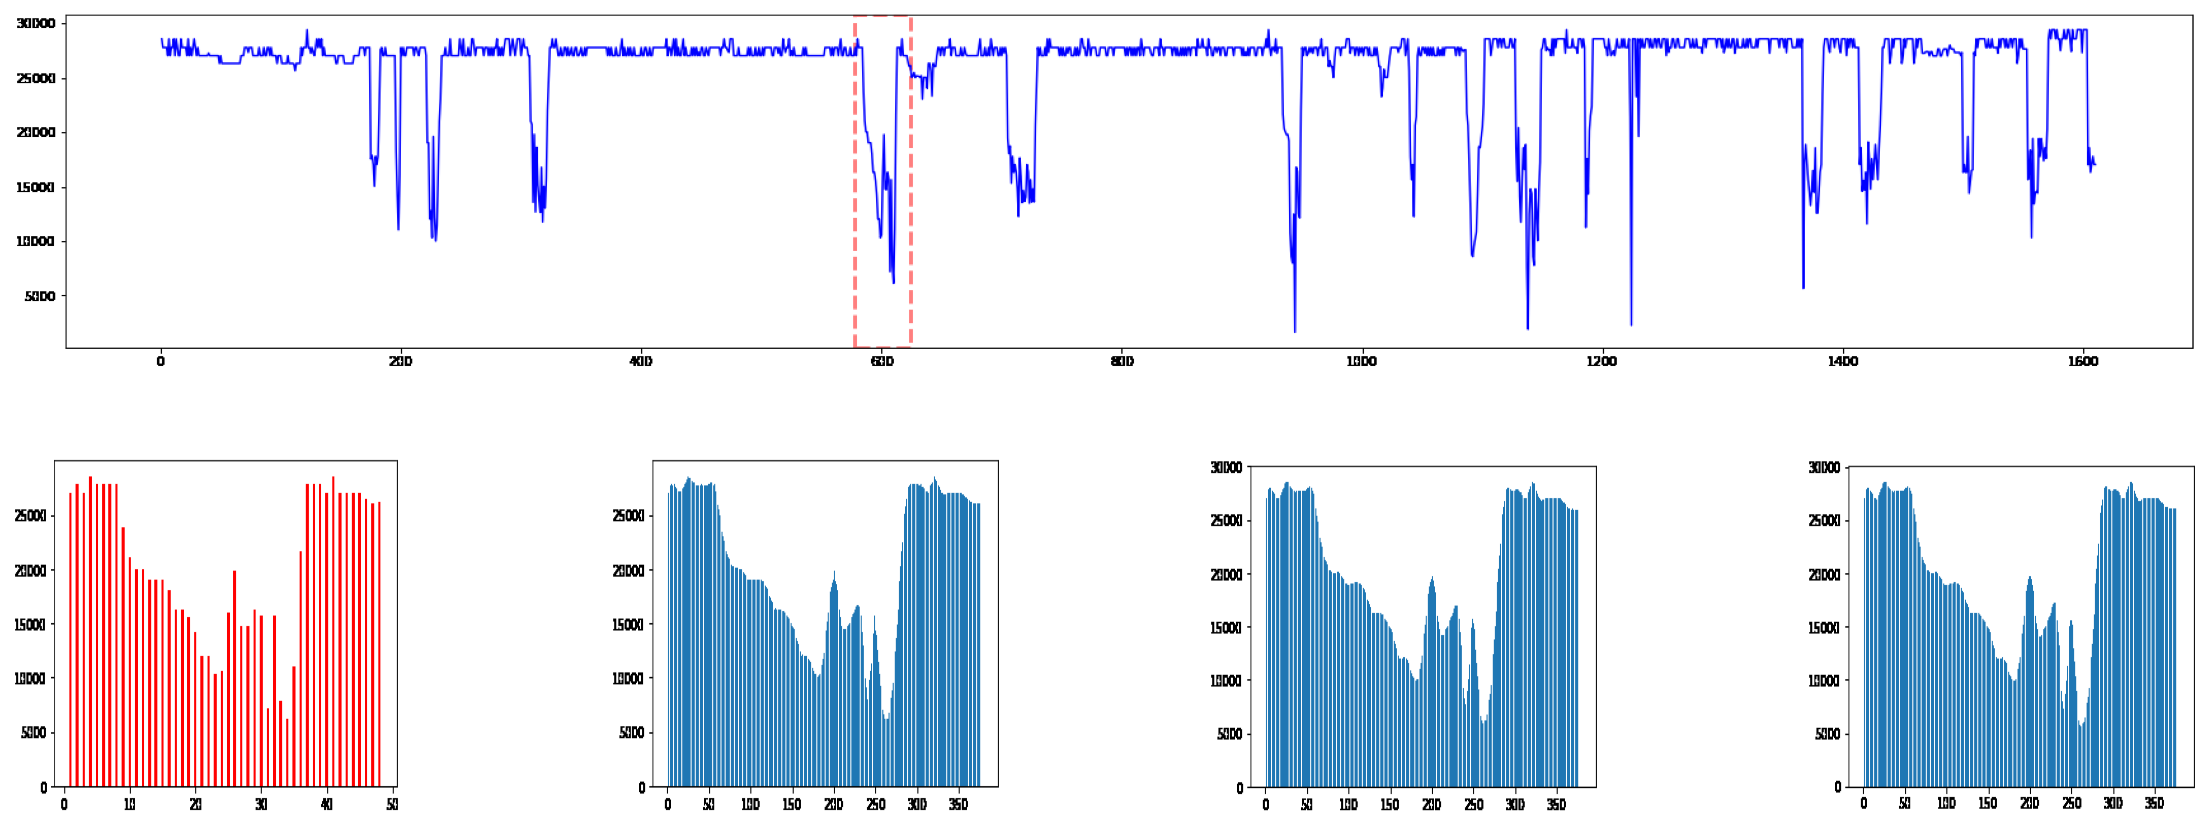

In [ ]:

# code for displaying multiple images in one figure

#import libraries
import cv2
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 5)
gs.update(wspace=0.5)

# create figure
fig = plt.figure(figsize=(50,15))

# setting values to rows and column variables
rows = 2
columns = 4

# reading images
Image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/whole_signal/sig_fl2.png')
Image1 = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)
Image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/histograms/field2/sig12_hr.png')
Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)
Image3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/histograms/field2/sig12_pr.png')
Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB)
Image4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/histograms/field2/sig12_tf_pr.png')
Image4 = cv2.cvtColor(Image4, cv2.COLOR_BGR2RGB)
Image5 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/histograms/field2/sig12_bicu_pr.png')
Image5 = cv2.cvtColor(Image5, cv2.COLOR_BGR2RGB)
# Adds a subplot at the 1st position
#fig.add_subplot(rows, columns, 1)
fig.add_subplot(gs[0, 0:4])
# showing image
plt.imshow(Image1,aspect="auto")
plt.axis('off')
#plt.title("(1)")

# Adds a subplot at the 2nd position
fig.add_subplot(gs[1,0])

# showing image
plt.imshow(Image2,aspect="auto")
plt.axis('off')
#plt.title("(2)")

# Adds a subplot at the 3rd position
fig.add_subplot(gs[1,1])

# showing image
plt.imshow(Image3,aspect="auto")
plt.axis('off')
#plt.title("(3)")

# Adds a subplot at the 4th position
fig.add_subplot(gs[1,2])

# showing image
plt.imshow(Image4,aspect="auto")
plt.axis('off')
#plt.title("(4)")

# Adds a subplot at the 5th position
fig.add_subplot(gs[1,3])

# showing image
plt.imshow(Image5,aspect="auto")
plt.axis('off')
#plt.title("(5)")

**Field6 Test Signal**

(-0.5, 386.5, 247.5, -0.5)

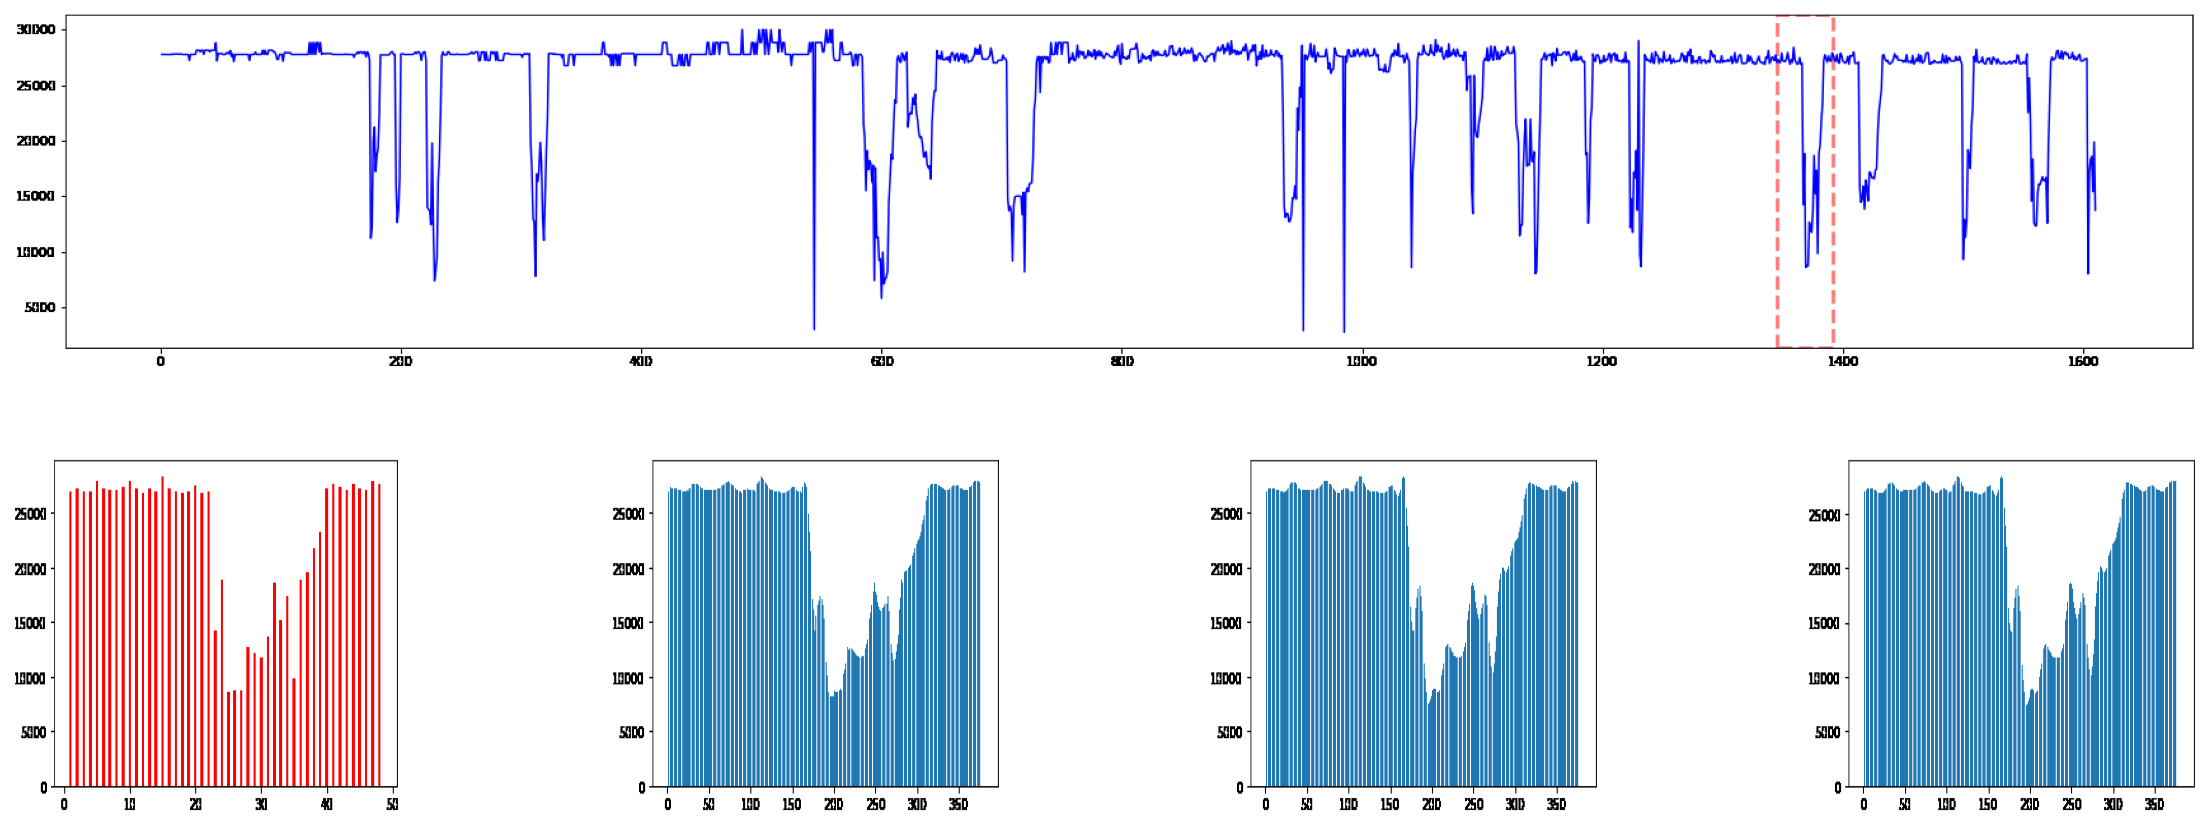

In [ ]:

# code for displaying multiple images in one figure

#import libraries
import cv2
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 5)
gs.update(wspace=0.5)

# create figure
fig = plt.figure(figsize=(50,15))

# setting values to rows and column variables
rows = 2
columns = 4

# reading images
Image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/whole_signal/sig_fl6.png')
Image1 = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)
Image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/histograms/field6/sig28_hr.png')
Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)
Image3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/histograms/field6/sig28_pr.png')
Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB)
Image4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/histograms/field6/sig28_tf_pr.png')
Image4 = cv2.cvtColor(Image4, cv2.COLOR_BGR2RGB)
Image5 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/output/histograms/field6/sig28_bicu_pr.png')
Image5 = cv2.cvtColor(Image5, cv2.COLOR_BGR2RGB)
# Adds a subplot at the 1st position
#fig.add_subplot(rows, columns, 1)
fig.add_subplot(gs[0, 0:4])
# showing image
plt.imshow(Image1,aspect="auto")
plt.axis('off')
#plt.title("(1)")

# Adds a subplot at the 2nd position
fig.add_subplot(gs[1,0])

# showing image
plt.imshow(Image2,aspect="auto")
plt.axis('off')
#plt.title("(2)")

# Adds a subplot at the 3rd position
fig.add_subplot(gs[1,1])

# showing image
plt.imshow(Image3,aspect="auto")
plt.axis('off')
#plt.title("(3)")

# Adds a subplot at the 4th position
fig.add_subplot(gs[1,2])

# showing image
plt.imshow(Image4,aspect="auto")
plt.axis('off')
#plt.title("(4)")

# Adds a subplot at the 5th position
fig.add_subplot(gs[1,3])

# showing image
plt.imshow(Image5,aspect="auto")
plt.axis('off')
#plt.title("(5)")

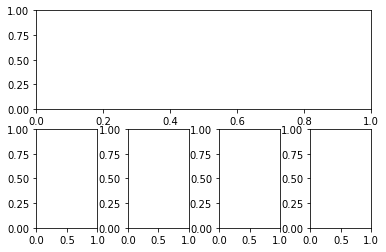

In [ ]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)

plt.subplot(gs[0, 0:4])
plt.subplot(gs[1,0] )
plt.subplot(gs[1,1])
plt.subplot(gs[1,2] )
plt.subplot(gs[1,3])
plt.show()


# Extra Work

In [ ]:
from train import load_h5_list,load_h5
import numpy as np
import math as mt
from scipy import interpolate

datasets = load_h5_list('/content/audio-super-res/data/vctk/train_data/')

def Tchebyshef_init_main():
  N = 48
  order = N-1
  t_hat = np.zeros((N+1,N+1))

  for x in range(0,(N//2)):
      t_hat[1][x+1] = 1/mt.sqrt(N)
      t_hat[2][x+1] = (2*x+1-N)*mt.sqrt(3/(N*(N**2-1)))
      for n in range(2):
          t_hat[n+1][N-x] = (-1)**n*t_hat[n+1][x+1]

  for n in range(2,order+1):
      t_hat[n+1][1] = (-mt.sqrt(((N-n)*(2*n+1))/((N+n)*(2*n-1))))*(t_hat[n][1])
      t_hat[n+1][2] = (1+n*(1+n)/(1-N))*t_hat[n+1][1]
      for x in range(2):
          t_hat[n+1][N-x] = (-1)**n*t_hat[n+1][x+1]
      for x in range(2,N//2):
          y1 = (-n*(n+1)-(2*x-1)*(x-N-1)-x)/(x*(N-x))
          y2 = (x-1)*(x-N-1)/(x*(N-x))
          t_hat[n+1][x+1] = y1*t_hat[n+1][x]+y2*t_hat[n+1][x-1];
          t_hat[n+1][N-x] = (-1)**n*t_hat[n+1][x+1]
  t_hat = np.delete(t_hat,0,0)
  t_hat = np.delete(t_hat,0,1)
  a= t_hat.copy()
  a= np.around(a,15)
  #a = nump.transpose(a)
  a=np.array(a)
  return a
def Tchebyshef_init_target():
  N = 384
  order = N-1
  t_hat = np.zeros((N+1,N+1))

  for x in range(0,(N//2)):
      t_hat[1][x+1] = 1/mt.sqrt(N)
      t_hat[2][x+1] = (2*x+1-N)*mt.sqrt(3/(N*(N**2-1)))
      for n in range(2):
          t_hat[n+1][N-x] = (-1)**n*t_hat[n+1][x+1]

  for n in range(2,order+1):
      t_hat[n+1][1] = (-mt.sqrt(((N-n)*(2*n+1))/((N+n)*(2*n-1))))*(t_hat[n][1])
      t_hat[n+1][2] = (1+n*(1+n)/(1-N))*t_hat[n+1][1]
      for x in range(2):
          t_hat[n+1][N-x] = (-1)**n*t_hat[n+1][x+1]
      for x in range(2,N//2):
          y1 = (-n*(n+1)-(2*x-1)*(x-N-1)-x)/(x*(N-x))
          y2 = (x-1)*(x-N-1)/(x*(N-x))
          t_hat[n+1][x+1] = y1*t_hat[n+1][x]+y2*t_hat[n+1][x-1];
          t_hat[n+1][N-x] = (-1)**n*t_hat[n+1][x+1]
  t_hat = np.delete(t_hat,0,0)
  t_hat = np.delete(t_hat,0,1)
  a= t_hat.copy()
  a= np.around(a,15)
  #a = nump.transpose(a)
  a=np.array(a)
  return a

def prep_X_tchef(X):
  print(len(X))
  #X = X.flatten()
  #print(X)
  x = []
  Q = Tchebyshef_init_main()
  for i in range(len(X)):
    X_tr = X[i]
    X_tr = X_tr.flatten()

    #print(len(X_tr))
    #for j in range(len(X_tr)):
    Tx =np.matmul(X_tr,np.transpose(Q))
    Tx =Tx.reshape(len(Tx))
    #print("Tx len:",len(Tx))
    x_tr = Tx
    #print(x_tr)
    x.append(x_tr.reshape(48,1))
  x = np.array(x)
  print(x.shape)
  return x


  #recover
  # r_x = []
  # for j in range(len(x_tr)):
  #   tx = np.matmul(x_tr[j].reshape(len(x_tr[j])),Q)
  #   tx = tx.reshape(len(tx))
  #   r_x.append(tx)
  # print(r_x)

def prep_Y_tchef(X):
  print(len(X))
  #X = X.flatten()
  #print(X)
  x = []
  Q = Tchebyshef_init_target()
  for i in range(len(X)):
    X_tr = X[i]
    X_tr = X_tr.flatten()

    #print(len(X_tr))
    #for j in range(len(X_tr)):
    Tx =np.matmul(X_tr,np.transpose(Q))
    Tx =Tx.reshape(len(Tx))
    #print("Tx len:",len(Tx))
    x_tr = Tx
    #print(x_tr)
    x.append(x_tr.reshape(384,1))
  x = np.array(x)
  print(x.shape)
  return x
  #recover
  # r_x = []
  # for j in range(len(x_tr)):
  #   tx = np.matmul(x_tr[j].reshape(len(x_tr[j])),Q)
  #   tx = tx.reshape(len(tx))
  #   r_x.append(tx)
  # print(r_x)
def upsample(x_lr, r):
    x_lr = x_lr.flatten()
    x_hr_len = len(x_lr) * r
    x_sp = np.zeros(x_hr_len)

    i_lr = np.arange(x_hr_len, step=r)
    i_hr = np.arange(x_hr_len)

    f = interpolate.splrep(i_lr, x_lr)
    x_sp = interpolate.splev(i_hr, f)

    return x_sp

def prep_dummy_signal(X):
  x = []
  for i in range(len(X)):
    X_tr = X[i]
    X_tr = X_tr.flatten()
    X_sp = upsample(X_tr,8)
    x.append(X_sp.reshape(384,1))
  x = np.array(x)
  print(x.shape)
  return x

for dataset in datasets:
    X,Y = load_h5(dataset)
prep_dummy_signal(X)

# X_new = prep_X_tchef(X)
# #print(X_new)
# Y_new = prep_Y_tchef(Y)
# #print(Y_new)

Loading dataset  /content/audio-super-res/data/vctk/train_data/vctk-speaker1_d_8_new_fld1-train.2.4.4.2.h5
(24, 48, 1)
(24, 384, 1)
(24, 384, 1)


Loading dataset  /content/audio-super-res/data/vctk/train_data/vctk-speaker1_d_8_new_fld1-train.2.4.4.2.h5
(24, 48, 1)
(24, 384, 1)
(24, 48, 1)
(24, 384, 1)
X len: 384
[5976.    5966.75  5957.5   5948.25  5939.    5929.75  5920.5   5911.25
 5902.    5909.625 5917.25  5924.875 5932.5   5940.125 5947.75  5955.375
 5963.    5955.875 5948.75  5941.625 5934.5   5927.375 5920.25  5913.125
 5906.    5912.125 5918.25  5924.375 5930.5   5936.625 5942.75  5948.875
 5955.    5955.    5955.    5955.    5955.    5955.    5955.    5955.
 5955.    5958.125 5961.25  5964.375 5967.5   5970.625 5973.75  5976.875
 5980.    5978.625 5977.25  5975.875 5974.5   5973.125 5971.75  5970.375
 5969.    5972.    5975.    5978.    5981.    5984.    5987.    5990.
 5993.    5983.25  5973.5   5963.75  5954.    5944.25  5934.5   5924.75
 5915.    5919.25  5923.5   5927.75  5932.    5936.25  5940.5   5944.75
 5949.    5949.25  5949.5   5949.75  5950.    5950.25  5950.5   5950.75
 5951.    5956.75  5962.5   5968.25  59

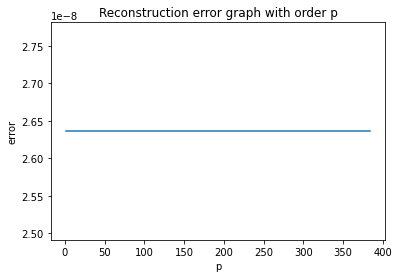

In [ ]:
import numpy as np
import math as mt
from train import  load_h5_list , load_h5
from numpy import random
import random
import matplotlib.pyplot as plt
import pandas as pd
scale = 8
n_point = 48
# wav = '/content/audio-super-res/data/vctk/output_field1/signal8.hr.csv'
# dt = pd.read_csv(wav)
# X = dt['field1']
#signal x(n)
#X = np.linspace(1,N,200)
#X = np.random.shuffle(X)
# X = []
# for i in range(200):
#   X.append(random.randint(0, 10))
#print(X)
datasets = load_h5_list('/content/audio-super-res/data/vctk/train_data/')
for dataset in datasets:
  X_t , Y_t = load_h5(dataset)
print(X_t.shape)
print(Y_t.shape)
X = Y_t[0]
X = X.flatten()
print("X len:",len(X))
print(X)
#X = random.randint(10,size=100)
def error(x,y):
  sum=0
  for i in range(len(x)):
    sum = sum + np.sqrt((x[i] - y[i])**2)
  return sum

def Tchebyshef_init():
  N = 384
  order = N-1
  t_hat = np.zeros((N+1,N+1))

  for x in range(0,(N//2)):
      t_hat[1][x+1] = 1/mt.sqrt(N)
      t_hat[2][x+1] = (2*x+1-N)*mt.sqrt(3/(N*(N**2-1)))
      for n in range(2):
          t_hat[n+1][N-x] = (-1)**n*t_hat[n+1][x+1]

  for n in range(2,order+1):
      t_hat[n+1][1] = (-mt.sqrt(((N-n)*(2*n+1))/((N+n)*(2*n-1))))*(t_hat[n][1])
      t_hat[n+1][2] = (1+n*(1+n)/(1-N))*t_hat[n+1][1]
      for x in range(2):
          t_hat[n+1][N-x] = (-1)**n*t_hat[n+1][x+1]
      for x in range(2,N//2):
          y1 = (-n*(n+1)-(2*x-1)*(x-N-1)-x)/(x*(N-x))
          y2 = (x-1)*(x-N-1)/(x*(N-x))
          t_hat[n+1][x+1] = y1*t_hat[n+1][x]+y2*t_hat[n+1][x-1];
          t_hat[n+1][N-x] = (-1)**n*t_hat[n+1][x+1]
  t_hat = np.delete(t_hat,0,0)
  t_hat = np.delete(t_hat,0,1)
  a= t_hat.copy()
  a= np.around(a,15)
  #a = nump.transpose(a)
  a=np.array(a)
  return a

Q = Tchebyshef_init()
print("Q len:",len(Q))
x_ind = []
rec_list = []
p=384
for i in range(0,p):
  temp = []
  for j in range(i+1):
    temp.append(Q[j])

  t = np.array(temp)
  #print("t:",t)
  T = np.matmul(X,np.transpose(Q))
  rec = np.matmul(T,Q)
  if i == 383:
    print("T:",T)
    print("reconstruction signal:",rec)
  er = error(X,rec)
  rec_list.append(er)

#T(X) = XQ^t
# #X = np.reshape(X,[2,2])
T = np.matmul(X,np.transpose(Q))

# print("T(eq:8):",T)

# #inverse operaration

rec_res = np.matmul(T,Q)
print("reconstruction of X(eq : 10 result):",rec_res)
# print("rec_list error:",rec_list)
# f = np.linalg.pinv(np.transpose(Q))
# X = np.matmul(T,f)
# print("inverse process by pshedo inverse: X ",X)


#plotting of reconstruction error

N = 384
# x axis values
x = np.arange(1,N+1)
# corresponding y axis values
y = rec_list

# plotting the points
plt.plot(x, y)

# naming the x axis
plt.xlabel('p')
# naming the y axis
plt.ylabel('error')

# giving a title to my graph
plt.title('Reconstruction error graph with order p')

# function to show the plot
plt.show()

Bi spline method

In [ ]:
import numpy as np
from scipy import interpolate
import csv
import pandas as pd
from train import load_h5_list , load_h5
def calc_snr2(Y, P):
  sqrt_l2_loss = np.sqrt(np.mean((P-Y)**2 + 1e-6))
  sqrn_l2_norm = np.sqrt(np.mean(Y**2))
  snr = 20 * np.log(sqrn_l2_norm / sqrt_l2_loss + 1e-8) / np.log(10.)
  avg_snr = np.mean(snr)
  return avg_snr
def upsample(x_lr, r):
    x_lr = x_lr.flatten()
    x_hr_len = len(x_lr) * r
    x_sp = np.zeros(x_hr_len)

    i_lr = np.arange(x_hr_len, step=r)
    i_hr = np.arange(x_hr_len)

    f = interpolate.splrep(i_lr, x_lr)
    x_sp = interpolate.splev(i_hr, f)

    return x_sp

datasets = load_h5_list('/content/audio-super-res/data/vctk/test_data/')
for dataset in datasets:
  X , Y = load_h5(dataset)

outname = '/content/audio-super-res/data/vctk/out_f6/'
for i in range(len(X)):
  x_hr = X[i].flatten()
  target = Y[i].flatten()
  x_pr = upsample(x_hr,8)
  avg_snr = calc_snr2(target,x_pr)
  if i == 24:
    print("snr:",avg_snr)
  #save csv file
  f_name = 'signal'+str(i)+'.pr.csv'
  print(f_name)
  dict = {'field6': x_pr}
  df = pd.DataFrame(dict)
  df.to_csv(outname +f_name)

Loading dataset  /content/audio-super-res/data/vctk/test_data/vctk-speaker1_d_8_new_fld6-train.2.4.4.2.h5
(33, 48, 1)
(33, 384, 1)
signal0.pr.csv
signal1.pr.csv
signal2.pr.csv
signal3.pr.csv
signal4.pr.csv
signal5.pr.csv
signal6.pr.csv
signal7.pr.csv
signal8.pr.csv
signal9.pr.csv
signal10.pr.csv
signal11.pr.csv
signal12.pr.csv
signal13.pr.csv
signal14.pr.csv
signal15.pr.csv
signal16.pr.csv
signal17.pr.csv
signal18.pr.csv
signal19.pr.csv
signal20.pr.csv
signal21.pr.csv
signal22.pr.csv
signal23.pr.csv
snr: 39.99570430675423
signal24.pr.csv
signal25.pr.csv
signal26.pr.csv
signal27.pr.csv
signal28.pr.csv
signal29.pr.csv
signal30.pr.csv
signal31.pr.csv
signal32.pr.csv


In [ ]:
import pandas as pd
import csv
from pandas import DataFrame
import numpy as np
Total_pr_data = []
for i in range(33):
  wav ='signal'+ str(i) +'.csv'
  print(wav)
  dt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/Sensor_data_field6/'+wav)
  data = dt['field6']
  #data=data[:len(data)-7]
  # for j in data:
  #   Total_pr_data.append(j)
  dict = {'field1': data}
  df = pd.DataFrame(dict)
  df.to_csv('/content/drive/MyDrive/Colab Notebooks/Sensor_signal_SR/Total_data/'+'signal'+ str(i+66) +'.csv')


signal0.csv
signal1.csv
signal2.csv
signal3.csv
signal4.csv
signal5.csv
signal6.csv
signal7.csv
signal8.csv
signal9.csv
signal10.csv
signal11.csv
signal12.csv
signal13.csv
signal14.csv
signal15.csv
signal16.csv
signal17.csv
signal18.csv
signal19.csv
signal20.csv
signal21.csv
signal22.csv
signal23.csv
signal24.csv
signal25.csv
signal26.csv
signal27.csv
signal28.csv
signal29.csv
signal30.csv
signal31.csv
signal32.csv


In [ ]:
f = open("dataset_prepare/train_data.txt", "w")
for i in range(99):
  f.write('signal'+str(i)+'.csv'+'\n')

f.close()

In [ ]:
!python code/train.py

load residual network ..
2022-03-19 05:18:15.640991: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 384, 16)      64          ['input_1[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 384, 16)      0           ['conv1d[0][0]']                 
                                                                                                  
 conv1

In [ ]:
!python code/test.py

load residual network ..
2022-03-19 05:22:23.712001: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld1-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
(1, 384, 1)
snr: 38.41161625877733
x_pr len: 384


In [ ]:
!python code/train.py

laplacian model load..
2022-03-19 05:25:08.998958: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
net_tmp: (None, 48, 16)
net_tmp: (None, 48, 16)
net_feature before subpixel: (None, 48, 16)
net_feature: (1, 96, 16)
net_audio: (1, 96, 16)
net_tmp: (1, 96, 16)
net_tmp: (1, 96, 16)
net_feature before subpixel: (1, 96, 16)
net_audio: (1, 192, 16)
net_tmp: (1, 192, 16)
net_tmp: (1, 192, 16)
net_feature before subpixel: (1, 192, 16)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 48, 16)       64          ['inpu

In [ ]:
!python code/test.py

laplacian model load..
2022-03-19 05:36:16.111729: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
net_tmp: (None, 48, 16)
net_tmp: (None, 48, 16)
net_feature before subpixel: (None, 48, 16)
net_feature: (1, 96, 16)
net_audio: (1, 96, 16)
net_tmp: (1, 96, 16)
net_tmp: (1, 96, 16)
net_feature before subpixel: (1, 96, 16)
net_audio: (1, 192, 16)
net_tmp: (1, 192, 16)
net_tmp: (1, 192, 16)
net_feature before subpixel: (1, 192, 16)
load model weights success!
model compilation success!
Loading dataset  dataset_prepare/test_data/sensor_data_s_8_fld1-test.2.4.4.2.h5
(1, 48, 1)
(1, 384, 1)
(1, 48, 1)
(1, 384, 1)
snr: 42.47445246598343
x_pr len: 384


In [ ]:
import pandas as pd
import csv
from pandas import DataFrame
import numpy as np

#dates set up
#**********************************************************
dates_res = []
st_point = 1
for i in range(33):

  wav ='signal_date'+ str(i)+'.csv'
  print(wav)
  path = '/content/audio-super-res/data/vctk/Sensor_data_date/' + wav
  dt = pd.read_csv(path)
  dt = dt.set_index(['entry_id'])
  dates = dt['created_at']
  #print(dates)
  data_utc= pd.to_datetime(dt["created_at"],format="%Y-%m-%d %H:%M:%S UTC")

  # for i in data_utc:
  #   #print(i)
  #   st_point += 1
  # print(st_point-1)
  st_point = 1
  # dates_res = []
  print("data_utc_len:",len(data_utc))
  for start in data_utc:
    #find interval
    #print(start,":",st_point)
    if st_point == 48:
      dates_res.append(start)
      break
    dif = data_utc[st_point+1]-start
    duration_in_s = dif.total_seconds()
    interval=duration_in_s//8
    st = str(int(interval))+'S'
    res=pd.date_range(start, periods=9, freq=st)
    for res in res[0:8]:
      dates_res.append(res)
      #print(dates[st_entry])
      #st_entry = st_entry + 1
    st_point = st_point+1
#*************************************************


#print(dates_res)

#read prediction data fld1
pred = pd.read_csv('/content/audio-super-res/data/vctk/out_f1/filed1_b_prediction.csv')

fld1 = pred['field1']

print(len(dates_res))
print(len(fld1))

# field2
pred = pd.read_csv('/content/audio-super-res/data/vctk/out_f2/filed2_b_prediction.csv')

fld2 = pred['field2']

print(len(dates_res))
print(len(fld1))
#field3
pred = pd.read_csv('/content/audio-super-res/data/vctk/out_f3/filed3_b_prediction.csv')

fld3 = pred['field3']

print(len(dates_res))
print(len(fld1))
#field6
pred = pd.read_csv('/content/audio-super-res/data/vctk/out_f6/filed6_b_prediction.csv')

fld6 = pred['field6']

print(len(dates_res))
print(len(fld1))

#make csv for final result with dates
if len(dates_res) == len(fld1):
  print("same shape")
  dict = {'created_at':dates_res,'field1': fld1,'field2':fld2 ,'field3':fld3,'field6':fld6}
  df = pd.DataFrame(dict)
  df.to_csv('/content/audio-super-res/data/vctk/field1236_bi_spline_with_date_scale_8.csv')


signal_date0.csv
data_utc_len: 48
signal_date1.csv
data_utc_len: 48
signal_date2.csv
data_utc_len: 48
signal_date3.csv
data_utc_len: 48
signal_date4.csv
data_utc_len: 48
signal_date5.csv
data_utc_len: 48
signal_date6.csv
data_utc_len: 48
signal_date7.csv
data_utc_len: 48
signal_date8.csv
data_utc_len: 48
signal_date9.csv
data_utc_len: 48
signal_date10.csv
data_utc_len: 48
signal_date11.csv
data_utc_len: 48
signal_date12.csv
data_utc_len: 48
signal_date13.csv
data_utc_len: 48
signal_date14.csv
data_utc_len: 48
signal_date15.csv
data_utc_len: 48
signal_date16.csv
data_utc_len: 48
signal_date17.csv
data_utc_len: 48
signal_date18.csv
data_utc_len: 48
signal_date19.csv
data_utc_len: 48
signal_date20.csv
data_utc_len: 48
signal_date21.csv
data_utc_len: 48
signal_date22.csv
data_utc_len: 48
signal_date23.csv
data_utc_len: 48
signal_date24.csv
data_utc_len: 48
signal_date25.csv
data_utc_len: 48
signal_date26.csv
data_utc_len: 48
signal_date27.csv
data_utc_len: 48
signal_date28.csv
data_utc_len